In [401]:
import pandas as pd

In [403]:
file_path = '/users/christinadeperro/desktop/OIM7502/OIM7502_SP25/data/homes.csv'
try:
    df = pd.read_csv(file_path)
    print(df)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

    Sell   "List"   "Living"   "Rooms"   "Beds"   "Baths"   "Age"   "Acres"  \
0    142      160         28        10        5         3      60      0.28   
1    175      180         18         8        4         1      12      0.43   
2    129      132         13         6        3         1      41      0.33   
3    138      140         17         7        3         1      22      0.46   
4    232      240         25         8        4         3       5      2.05   
5    135      140         18         7        4         3       9      0.57   
6    150      160         20         8        4         3      18      4.00   
7    207      225         22         8        4         2      16      2.22   
8    271      285         30        10        5         2      30      0.53   
9     89       90         10         5        3         1      43      0.30   
10   153      157         22         8        3         3      18      0.38   
11    87       90         16         7        3     

In [405]:
print(df.describe(include='all'))

             Sell      "List"   "Living"    "Rooms"     "Beds"    "Baths"  \
count   50.000000   50.000000  50.000000  50.000000  50.000000  50.000000   
mean   170.360000  178.340000  21.120000   8.060000   3.820000   1.860000   
std     72.755885   79.382723   8.351072   1.284285   0.690755   0.756199   
min     87.000000   90.000000  10.000000   5.000000   3.000000   1.000000   
25%    135.000000  140.000000  17.000000   7.000000   3.000000   1.000000   
50%    152.000000  160.000000  20.000000   8.000000   4.000000   2.000000   
75%    182.250000  190.000000  22.750000   9.000000   4.000000   2.000000   
max    567.000000  625.000000  64.000000  12.000000   6.000000   4.000000   

            "Age"    "Acres"       "Taxes"  
count   50.000000  50.000000     50.000000  
mean    30.220000   1.020600   3706.100000  
std     30.962314   1.191496   1579.915268  
min      2.000000   0.220000   1445.000000  
25%     12.250000   0.382500   3107.000000  
50%     24.500000   0.550000   3490.

This dataset tells us there is a total count of 50 houses listed for sale. The mean tells us the average out of all the 50 houses listed (average selling price, listing price, # of living rooms, # of rooms, # of beds, # of baths, how old the home is, # of acres and tax amounts on the property). STD represents standard deviation, telling us the average variability in the results for each metric (the higher the number, the more variance there is between all the 50 values listed for that specific metric). Min shows the minimum values listed for the selling price, listing price and # of rooms, etc. Max shows the maximum values listed. The percentile buckets reflect the proportion of the values (example: the selling price of 135 falls under the 25 percentile, meaning 25% of the total values are less than 135).

In [407]:
df.rename(columns={'Sell': 'Sell', '"List"': 'List', '"Living"': 'Living','"Rooms"': 'Rooms', '"Beds"': 'Beds','"Baths"': 'Baths', '"Age"': 'Age','"Acres"': 'Acres', '"Taxes"': 'Taxes'}, inplace=True)
df.columns = ['Sell','List', 'Living', 'Rooms','Beds', 'Baths', 'Age','Acres', 'Taxes']
print(df)

    Sell  List  Living  Rooms  Beds  Baths  Age  Acres  Taxes
0    142   160      28     10     5      3   60   0.28   3167
1    175   180      18      8     4      1   12   0.43   4033
2    129   132      13      6     3      1   41   0.33   1471
3    138   140      17      7     3      1   22   0.46   3204
4    232   240      25      8     4      3    5   2.05   3613
5    135   140      18      7     4      3    9   0.57   3028
6    150   160      20      8     4      3   18   4.00   3131
7    207   225      22      8     4      2   16   2.22   5158
8    271   285      30     10     5      2   30   0.53   5702
9     89    90      10      5     3      1   43   0.30   2054
10   153   157      22      8     3      3   18   0.38   4127
11    87    90      16      7     3      1   50   0.65   1445
12   234   238      25      8     4      2    2   1.61   2087
13   106   116      20      8     4      1   13   0.22   2818
14   175   180      22      8     4      2   15   2.06   3917
15   165

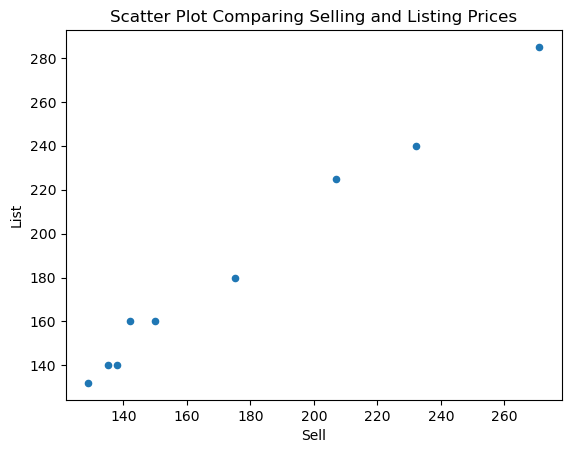

In [409]:
import matplotlib.pyplot as plt
data = {'Sell': [142, 175, 129, 138, 232,135,150,207,271], 
        'List': [160, 180, 132, 140, 240,140,160,225,285]}
df = pd.DataFrame(data)
df.plot(x=df.columns[0], y=df.columns[1], kind='scatter')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('Scatter Plot Comparing Selling and Listing Prices')
plt.show()


Above is a scatter plot against the selling price and listing price, using a sample of 10 homes. Based on this scatter plot, it seems there is a positive correlation between the two metrics. This relationship gives us insight as to whether a buyer is willing to pay more or less than what the seller is offering for the home. Given the results, we can assume the homebuyer bids less than the selling price. 

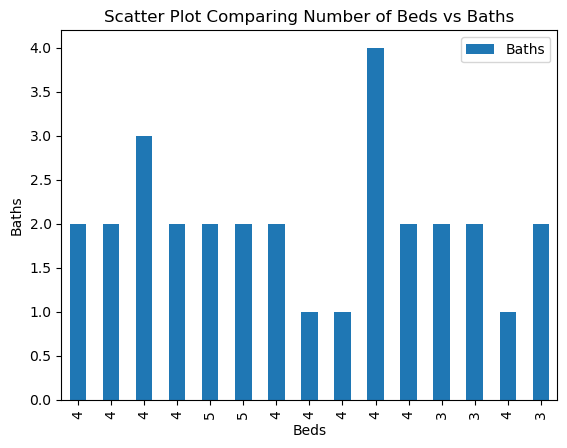

In [411]:
import matplotlib.pyplot as plt
data = {'Beds': [4,4,4,4,5,5,4,4,4,4,4,3,3,4,3], 
        'Baths': [2,2,3,2,2,2,2,1,1,4,2,2,2,1,2]}
df = pd.DataFrame(data)
df.plot(x=df.columns[0], y=df.columns[1], kind='bar')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('Scatter Plot Comparing Number of Beds vs Baths')
plt.show()

Above is a bar chart using a random sample data of 15 homes, comparing the number of beds and baths. Based on the above representation, we can assume most homes with 4 bedrooms also have 2 full baths.

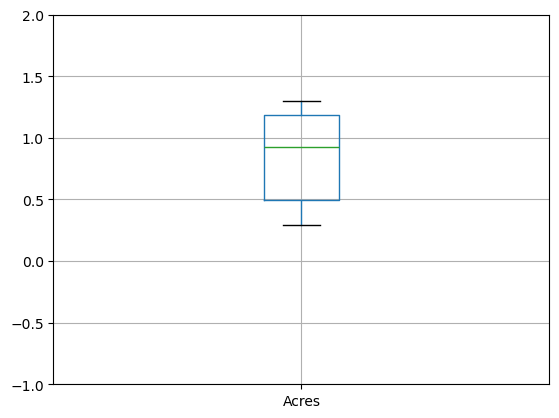

In [433]:
import matplotlib.pyplot as plt
data = {'Acres': [1.30, 0.30, 0.29, 0.43, 0.85, 1.00, 1.20, 1.13, 0.70, 1.20]}
df = pd.DataFrame(data)
df.boxplot(column=['Acres'])
plt.ylim(-1, 2)
plt.show()

The above boxplot represents sample acreage data against 15 homes. The median acreage is somehwere between 0.85 and 1.0 acre. The minimum acreage is about 0.25 and maximum is 1.25. 50% of the values fall between 0.5 acres and 1.15 acres, while 25% of the values are either between 1.15-1.25 acres or 0.25-0.5 acres.

In [450]:
import pandas as pd
df = pd.read_csv('/users/christinadeperro/desktop/OIM7502/OIM7502_SP25/data/homes.csv')
df.rename(columns={'Sell': 'Sell', '"List"': 'List', '"Living"': 'Living','"Rooms"': 'Rooms', '"Beds"': 'Beds','"Baths"': 'Baths', '"Age"': 'Age','"Acres"': 'Acres', '"Taxes"': 'Taxes'}, inplace=True)
df.columns = ['Sell','List', 'Living', 'Rooms','Beds', 'Baths', 'Age','Acres', 'Taxes']

import statsmodels.api as sm
y = df['Sell']
X = df['Taxes'] 
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           7.22e-19
Time:                        14:07:58   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.1

The R-Square value of these results reflect how well the data fits in the models (with values closer to 1 represening a stronger fit). That said, the regression analysis works as a good model but not the most optimal. P-value for taxes is less than 0.05, indicating statistical significance, where there is a strong correlation between the selling prices and taxes. Due to the nature of this direct relationship that exists, we could assume with some level of confidence that an increase in the selling price will yield an increase in taxes. 

In [456]:
import pandas as pd
df = pd.read_csv('/users/christinadeperro/desktop/OIM7502/OIM7502_SP25/data/homes.csv')
df.rename(columns={'Sell': 'Sell', '"List"': 'List', '"Living"': 'Living','"Rooms"': 'Rooms', '"Beds"': 'Beds','"Baths"': 'Baths', '"Age"': 'Age','"Acres"': 'Acres', '"Taxes"': 'Taxes'}, inplace=True)
df.columns = ['Sell','List', 'Living', 'Rooms','Beds', 'Baths', 'Age','Acres', 'Taxes']

import statsmodels.api as sm
y = df['Sell']
X = df['List'] 
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     9312.
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           1.26e-56
Time:                        15:08:50   Log-Likelihood:                -152.97
No. Observations:                  50   AIC:                             309.9
Df Residuals:                      48   BIC:                             313.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3274      1.846      3.969      0.0

The above regression analysis, using the selling price and listing price, is an optimal model given that the R-squared value is closer to 1 than the previous model. This is the better model. Based on the p-value reflected, we can assume there is a direct positive relationship between the selling price and listing price. When the listing price increased, the selling price decreases. Additionally, the larger t-value for lists indicates that there's more variability in the results, making it a more accurate representation. 

In [463]:
import pandas as pd
df = pd.read_csv('/users/christinadeperro/desktop/OIM7502/OIM7502_SP25/data/homes.csv')
df.rename(columns={'Sell': 'Sell', '"List"': 'List', '"Living"': 'Living','"Rooms"': 'Rooms', '"Beds"': 'Beds','"Baths"': 'Baths', '"Age"': 'Age','"Acres"': 'Acres', '"Taxes"': 'Taxes'}, inplace=True)
df.columns = ['Sell','List', 'Living', 'Rooms','Beds', 'Baths', 'Age','Acres', 'Taxes']

import statsmodels.api as sm
y = df['Taxes']
X = df['Acres'] 
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Taxes   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.1714
Date:                Tue, 04 Mar 2025   Prob (F-statistic):              0.681
Time:                        15:39:24   Log-Likelihood:                -438.61
No. Observations:                  50   AIC:                             881.2
Df Residuals:                      48   BIC:                             885.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3625.3791    297.994     12.166      0.0

A regression anaylsis was conducted where acreage is the independent variable and taxes represent the dependent variable. Logically, we know there is a direct relationship between the amount of land a homebuyer purchases and the amount of taxes they'll pay for the property. However, the above results show there is no correlation between the two variables. This is an incorrect assumption as there can still be a positive relationship that exists even though the p-value for acres is greater than 0.05. Additionally, we know this type of model is not the best fit for representing this kind of data based on the low R-squared value, which is much closer to 0 than 1. 